In [1]:
from finance.client import Client
from finance.client.data_classes.accounts import Account
from finance.client.data_classes.records import Record

In [2]:
c = Client()

In [19]:
accounts = c.accounts.list()

In [21]:
for account in accounts:
    print(account.id)

882b8dca
605096bb
9c4b0e97
22d775cd
6c0037c1
463a9896
cb6a7a36
cc237820
affe99d7


In [4]:
def createRecord():
    
    date = input('Date (YYYY-MM-DD):')
    account_name = input('Account Name:')
    balance = input('Balance:')
    currency = input('Currency:')
    
    new_record = Record(
        date=date,
        account_id=c.accounts.list(name=account_name)[0].id,
        balance=balance,
        currency=currency
    )

    c.records.create(new_record)

In [17]:
records = c.records.list(account_id='affe99d7').to_pandas()
records['balance'] = records['balance'].astype(float)
records.head()

,date,account_id,balance,currency,id
0,2020-01-01,affe99d7,38055.82,USD,9ffeeab0
1,2020-02-01,affe99d7,35724.07,USD,f2286ad6
2,2020-03-01,affe99d7,34763.01,USD,bbd77ced
3,2020-04-01,affe99d7,28316.47,USD,fb2c9182
4,2020-05-01,affe99d7,33022.32,USD,08e45e70


/Users/hunterbeck/Documents/GitHub/finance-app/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

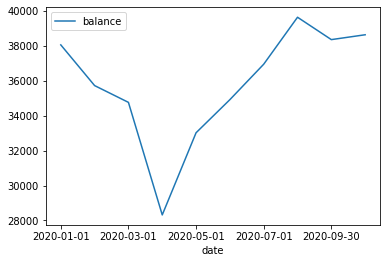

In [18]:
records.plot(x='date', y='balance')

In [8]:
createRecord()

Date (YYYY-MM-DD):2020-08-31
Account Name:SpareBank Debit
Balance:69045.18
Currency:NOK


In [9]:
createRecord()

Date (YYYY-MM-DD):2020-09-30
Account Name:SpareBank Debit
Balance:79379.10
Currency:NOK


In [11]:
createRecord()

Date (YYYY-MM-DD):2020-10-20
Account Name:SpareBank Savings
Balance:260008
Currency:NOK


In [1]:
import yaml

In [12]:
with open('config.yml') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)
    

link_list = []

for link in config['navbar']:
    link_list.append(
       (link, '#' + config['navbar'][link])
    )

In [13]:
link_list

[('SpareBank1',
  '#https://www.sparebank1.no/ostlandet/nettbank-privat/oversikt"'),
 ('Chase',
  '#https://secure05b.chase.com/web/auth/dashboard#/dashboard/accounts/summary/dda;params=dda,257633572'),
 ('Wealthfront', '#https://www.wealthfront.com/dashboard'),
 ('Optum HSA', '#https://account.optumbank.com/account'),
 ('Siemens Savings',
  '#https://leplb0700.upoint.alight.com/web/siemens/home?linkId=PRTL_DIRECT&technicalNameForLink=PRTL_DIRECT&userFriendlyNameForLink=Home&domain=Ben-CM&baseClientIndicator=Base'),
 ('Marcus', '#https://www.marcus.com/us/en/login')]

In [8]:
dir(c)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_country_codes',
 '_country_codes_file',
 '_currency_codes',
 '_currency_codes_file',
 '_db_path',
 'accounts',
 'labels',
 'records']

In [45]:
c.accounts.list()

,name,country_code,label_id,id
0,Chase Checking,USA,0de1ed51,882b8dca
1,Chase Savings,USA,0de1ed51,605096bb
2,Marcus Savings,USA,0de1ed51,9c4b0e97
3,SpareBank Savings,NOR,0de1ed51,22d775cd
4,SpareBank Debit,NOR,0de1ed51,6c0037c1
5,Wealthfront Cash Account,USA,0de1ed51,463a9896
6,SpareBank BSU,NOR,12c5ff9b,cb6a7a36
7,Optum USA,USA,12c5ff9b,cc237820
8,Siemens Savings Plan,USA,4fe0e2d2,affe99d7


In [43]:
country_codes = []
for account in accounts:
    country_codes.append(account.country_code)
country_codes = list(set(country_codes))

In [44]:
country_codes

['USA', 'NOR']

In [55]:
records = c.records.list().to_pandas()
accounts = c.accounts.list().to_pandas()
labels = c.labels.list().to_pandas()

In [56]:
master = records.merge(accounts, how='left', left_on='account_id', right_on='id')
master = master.merge(labels, how='left', left_on='label_id', right_on='id')

In [58]:
print(master)

          date account_id    balance currency      id_x                name_x  \
0   2020-04-01   605096bb    1089.66      USD  ab408c8b         Chase Savings   
1   2020-01-01   882b8dca    1664.45      USD  17ba75c5        Chase Checking   
2   2020-01-01   605096bb    1089.63      USD  502f1707         Chase Savings   
3   2020-01-01   6c0037c1  176984.38      NOK  a96f57bc       SpareBank Debit   
4   2020-01-01   22d775cd    5008.00      NOK  ff2d14db     SpareBank Savings   
..         ...        ...        ...      ...       ...                   ...   
68  2020-10-23   affe99d7   38635.28      USD  a58e511d  Siemens Savings Plan   
69  2020-08-31   6c0037c1   69045.18      NOK  5fa494de       SpareBank Debit   
70  2020-09-30   6c0037c1   79379.10      NOK  bf31ae85       SpareBank Debit   
71  2020-09-21   22d775cd  255008.00      NOK  efd32cfb     SpareBank Savings   
72  2020-10-20   22d775cd  260008.00      NOK  5e7e5789     SpareBank Savings   

   country_code   label_id 

In [62]:
l = [2,1,3]

In [63]:
l.sort()

In [65]:
l[-1]

3